The model uses an imbalanced dataset!

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn

In [6]:
train_dir="C:\\Users\\Ioana\\Documents\\FacialExpr\\train"
test_dir="C:\\Users\\Ioana\\Documents\\FacialExpr\\test"

C:\Users\Ioana\AppData\Local\Temp\ipykernel_9024\2738081943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="magma")


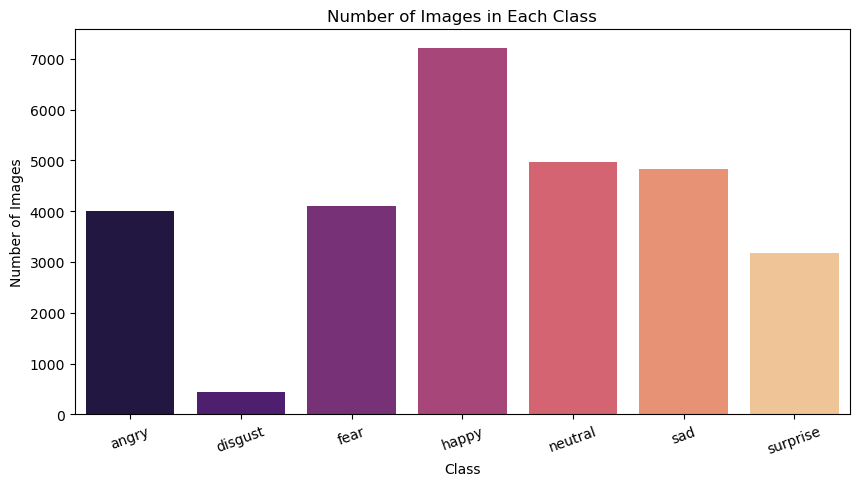

In [66]:
categories = os.listdir(train_dir)

image_counts = {category: len(os.listdir(os.path.join(train_dir, category))) for category in categories}

plt.figure(figsize=(10, 5))
seaborn.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="magma")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images in Each Class")
plt.xticks(rotation=20)
plt.show()

In [7]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(48, 48), 
    batch_size=32,
    color_mode='grayscale',  
    label_mode='int',  # Labels as integers (0 to 6)
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    label_mode='int',
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [10]:
model=Sequential()

In [11]:
from tensorflow.keras import regularizers

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Fixed
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Fixed
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))


C:\Users\Ioana\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,255 (1.36 MB)

 Trainable params: 356,551 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)



In [28]:
hist=model.fit(train_dataset, epochs=40, validation_data=test_dataset, callbacks=[tensorboard_callback])

Epoch 1/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 72s 75ms/step - accuracy: 0.2952 - loss: 2.0828 - val_accuracy: 0.4340 - val_loss: 1.6056
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.4405 - loss: 1.5775 - val_accuracy: 0.4315 - val_loss: 1.6297
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 66ms/step - accuracy: 0.4866 - loss: 1.4610 - val_accuracy: 0.4726 - val_loss: 1.5677
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.5134 - loss: 1.4005 - val_accuracy: 0.5056 - val_loss: 1.4549
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 65ms/step - accuracy: 0.5242 - loss: 1.3668 - val_accuracy: 0.4862 - val_loss: 1.4444
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 66ms/step - accuracy: 0.5406 - loss: 1.3474 - val_accuracy: 0.5071 - val_loss: 1.4216
Epoch 7/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 65ms/step - accuracy: 0.5447 - loss: 1.3301 - val_accuracy: 0.5035 - val_loss: 1.4524
Epoch 8/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 72s 80ms/step - accuracy: 0.5521 - loss: 1.3168 - 

In [32]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5913 - loss: 1.3232
Final Test Accuracy: 59.06%


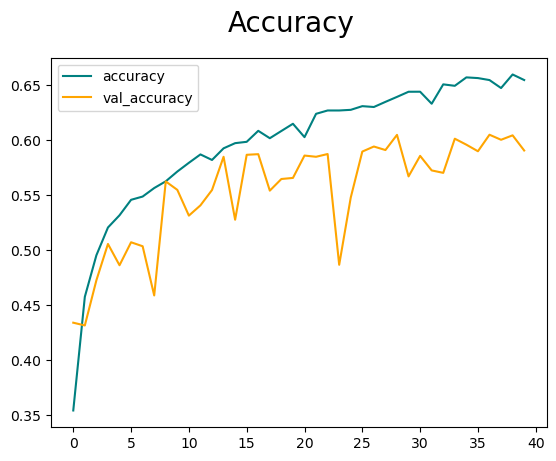

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

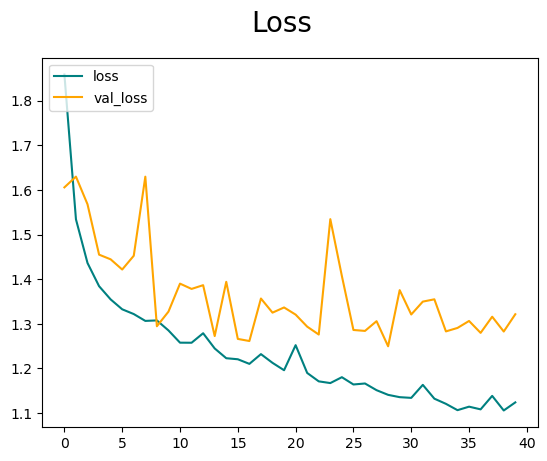

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [107]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Assuming the images are stored in a folder called 'test_images' and labels are known
test_images = []
test_labels = []

# Example for loading data manually (adjust this part to your own dataset structure)
image_dir = test_dir
label_map = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

# Loading the images and their corresponding labels
for label in label_map.keys():
    class_folder = os.path.join(image_dir, label_map[label])
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        img_array = image.img_to_array(img)  # Convert image to numpy array
        test_images.append(img_array)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_labels


array([0, 0, 0, ..., 6, 6, 6])

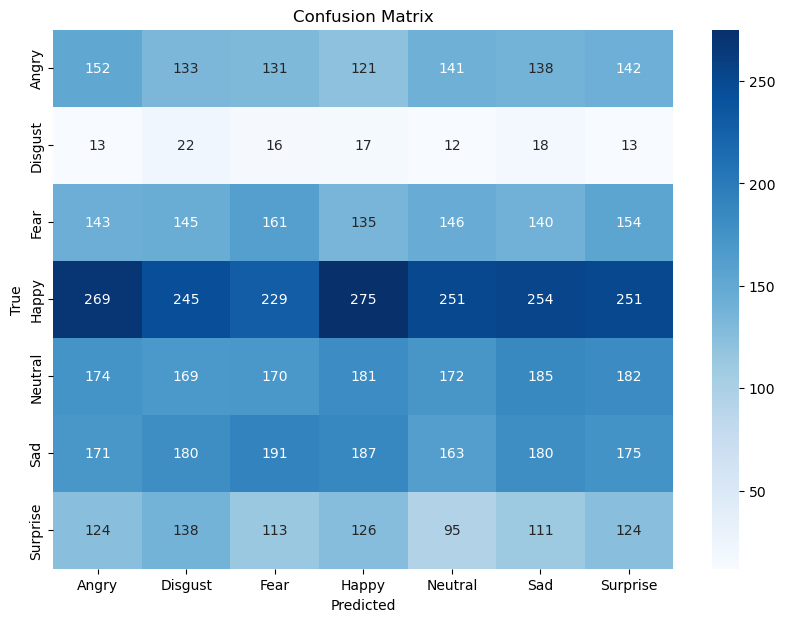

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
import os

# Define the label mapping
label_map = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

# Assuming you have test images and labels
# Example loading data manually (you can adjust this to your own dataset structure)
image_dir =test_dir  # Replace with your actual test data path
test_images = []
test_labels = []

# Load images and labels
for label in label_map.keys():
    class_folder = os.path.join(image_dir, label_map[label])
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        img_array = image.img_to_array(img)  # Convert image to numpy array
        test_images.append(img_array)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Assuming you already have the model prediction (y_pred)
# y_pred = model.predict(test_images)  # Uncomment this after you have the model's predictions

# For now, using random predictions (for testing purposes)
y_pred = np.random.rand(len(test_labels), 7)  # Replace this with actual model prediction
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[label_map[i] for i in range(7)], 
            yticklabels=[label_map[i] for i in range(7)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


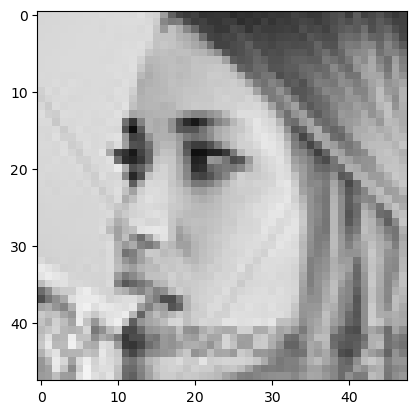

In [121]:
import cv2
img = cv2.imread('C:\\Users\\Ioana\\Documents\\FacialExpr\\train\\fear\\Training_12567.jpg')
plt.imshow(img)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted label: Happy


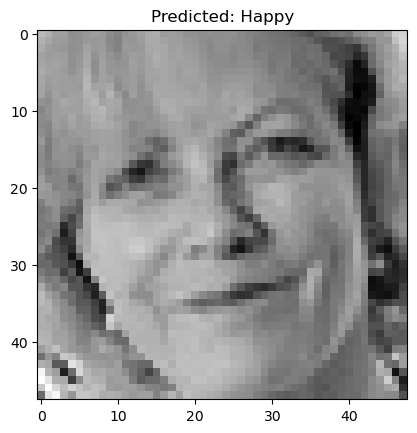

In [48]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the label mapping
label_map = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

# Load and preprocess the image
img_path = 'C:\\Users\\Ioana\\Documents\\FacialExpr\\train\\happy\\Training_143503.jpg'  
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale') 
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0 

# Predict the class using the trained model
y_pred = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(y_pred)

# Map the predicted class to the label
predicted_label = label_map[predicted_class]

# Print the predicted label
print(f"Predicted label: {predicted_label}")

# Optionally, show the image
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted label: Disgust


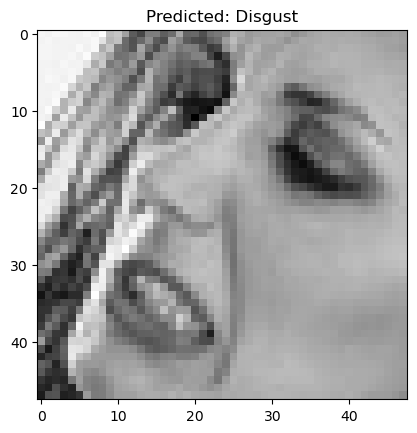

In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the label mapping
label_map = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

# Load and preprocess the image
img_path = 'C:\\Users\\Ioana\\Documents\\FacialExpr\\train\\disgust\\Training_98334760.jpg'  
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0 
# Predict the class using the trained model
y_pred = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(y_pred)

# Map the predicted class to the label
predicted_label = label_map[predicted_class]

# Print the predicted label
print(f"Predicted label: {predicted_label}")

# Optionally, show the image
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()
